# AlexNet Implemnetation TB Dataset
This is the implementation of AlexNet using the dataset that we got from AICrowd of CAT scans of lungs to determine the existence of terburculosis 

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#AlexNet Model
This create the AlexNet model. AlexNet consists of eight total layers, five convolutional layers, three max-pooling, and 3 fully-connected layers. Using RELU as the activation function since it has been found that it accelerated the speed of training by six times. It has two dropout layers to prevent the model from overfitting. For the output layer it is a Softmax layer. The architecture has about 62.3 million learnable parameters. 
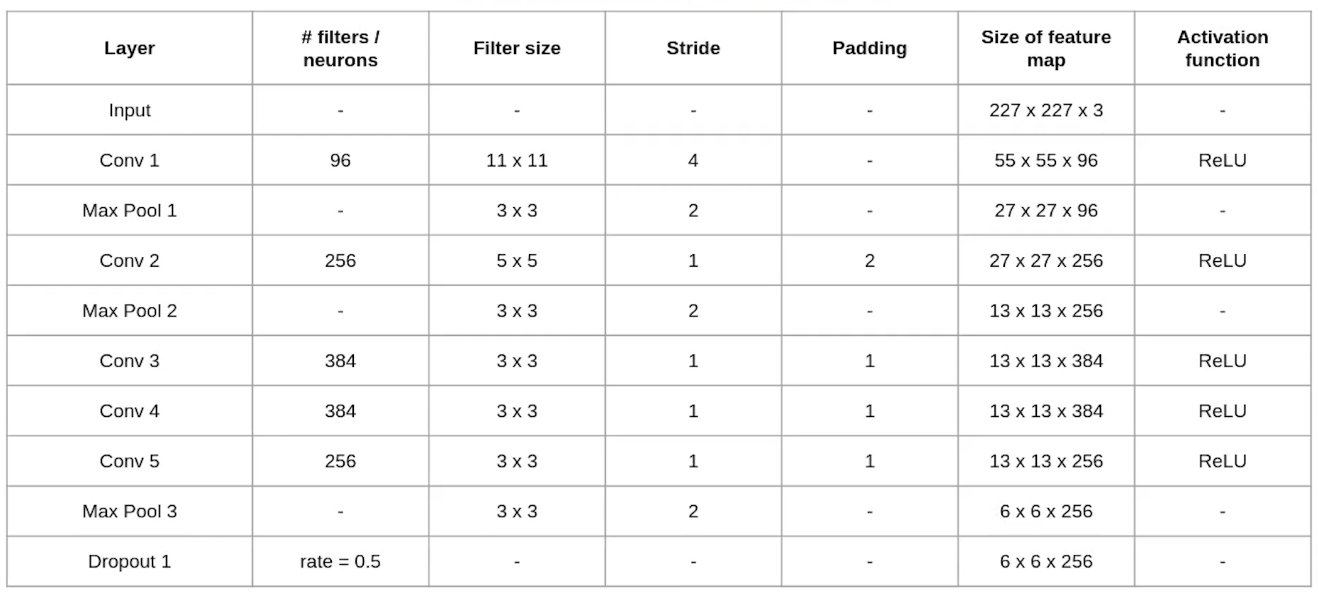

In [20]:
def AlexNet():
  model = keras.Sequential()
  # 1st Convolution Layer
  model.add(keras.layers.Conv2D(filters=96, kernel_size=(11,11), input_shape=(256, 256, 3), strides=(4,4), padding='valid'))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))
  # Max-Pooling
  model.add(keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='valid'))

  # 2nd Convolution Layer
  model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))
  # Max-Pooling
  model.add(keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='valid'))

  # 3rd Convolution Layer
  model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='same'))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))

  # 4th Convolution Layer
  model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), padding='same'))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))

  # 5th Convolution Layer
  model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))
  # Max-Pooling
  model.add(keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='valid'))

  # Flattening before passing to the Dense layer
  model.add(keras.layers.Flatten())

  # 1st Dense Layer
  model.add(keras.layers.Dense(4096))
  # Dropout
  model.add(keras.layers.Dropout(0.5))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))

  # 2nd Dense Layer
  model.add(keras.layers.Dense(4096))
  # Dropout
  model.add(keras.layers.Dropout(0.5))
  # Normalization
  model.add(keras.layers.BatchNormalization())
  # Activation Function
  model.add(keras.layers.Activation('relu'))

  # Output softmax Layer
  model.add(keras.layers.Dense(6))
  # Activation Function
  model.add(keras.layers.Activation('softmax'))
  return model

In [8]:
summ = AlexNet()
summ.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization_14 (Bat  (None, 62, 62, 96)       384       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 62, 62, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 256)     

# Resizing Images
This resizes the image to 256x256 for all of the folders and stores them into the Updated folder. Only needs to be run once.

In [ ]:
# This resizes the images, only run once
"""
base_dir = '/content/drive/My Drive/'
TB_data_dir = '/content/drive/My Drive/TB_Caverns_Data/train_jpgs_folders/'
TB_y_train = "/content/drive/MyDrive/TB_Caverns_Data/train_labels_TEST.csv"

for trn in os.listdir(TB_data_dir):
  path = TB_data_dir + trn
  copy_df = pd.read_csv(TB_y_train)
  dir_list = os.listdir(path)
  df = pd.DataFrame(columns=('ID', 'thick_walls', 'has_calcification', 'foci_around'))

  i = df.shape[0]
  for filename in dir_list:
    df.loc[i] = df.loc[i] = [filename, 1,1,1]
    i += 1
  pd.concat([copy_df, df]).to_csv('/content/drive/My Drive/TB_Caverns_Data/train_labels_TEST.csv', index=False)
  
  if not os.path.isdir('/content/drive/My Drive/TB_Caverns_Data/Updated/Updated_' + trn):
    os.mkdir("/content/drive/My Drive/TB_Caverns_Data/Updated/Updated_" + trn)
  new_path = "/content/drive/My Drive/TB_Caverns_Data/Updated/Updated_" + trn
  dir_list = os.listdir(path)
  for filename in dir_list:
    image = cv2.imread(path + '/' + filename)
    up_points = (256,256)
    resized_down = cv2.resize(image, up_points, interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(os.path.join(new_path, filename), resized_down)
"""

In [10]:
base_dir = '/content/drive/My Drive/'
TB_data_dir = '/content/drive/My Drive/TB_Caverns_Data/train_jpgs_folders/'
TB_y_train = "/content/drive/MyDrive/TB_Caverns_Data/train_labels_TEST.csv"

for trn in os.listdir(TB_data_dir):
  path = TB_data_dir + trn

  # This appends the labels for each file to the csv, only needs to be run once  
  """
  copy_df = pd.read_csv(TB_y_train)
  dir_list = os.listdir(path)
  df = pd.DataFrame(columns=('ID', 'thick_walls', 'has_calcification', 'foci_around'))

  i = df.shape[0]
  for filename in dir_list:
    df.loc[i] = df.loc[i] = [filename, 1,1,1]
    i += 1
  pd.concat([copy_df, df]).to_csv('/content/drive/My Drive/TB_Caverns_Data/train_labels_TEST.csv', index=False)
  """
  new_path = "/content/drive/My Drive/Updated/"
  dir_list = os.listdir(path)
  for filename in dir_list:
    image = cv2.imread(path + '/' + filename)
    up_points = (256,256)
    resized_down = cv2.resize(image, up_points, interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(os.path.join(new_path, filename), resized_down)

# Training
This trains the CNN with the Alexnet model for each folder of images. Each folder will have their own plot. Only works for one label. Will run it 3 times, one for each label that the TB_y_train.csv has.

In [16]:
def ModelFt(column):
  df=pd.read_csv("/content/drive/MyDrive/TB_Caverns_Data/train_labels_TEST.csv")
  columns=[column]
  datagen=ImageDataGenerator(rescale=1./255.)
  test_datagen=ImageDataGenerator(rescale=1./255.)
  train_generator=datagen.flow_from_dataframe(
  dataframe=df[:],
  directory="/content/drive/My Drive/Updated/",
  x_col="ID",
  y_col=columns,
  batch_size=10,
  seed=42,
  target_size=(256,256),
  class_mode="raw",
  shuffle=True)

  model = AlexNet()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  history = model.fit_generator(generator=train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      epochs=10
  )
  history_dict = history.history
  print(history_dict.keys())

  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')

  plt.figure()
  plt.plot(history.history['loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 60 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Found 18848 validated image filenames.
Epoch 1/10
1884/1884 [==============================] - 97s 49ms/step - loss: 5.2487e-04 - accuracy: 0.1309
Epoch 2/10
1884/1884 [==============================] - 89s 47ms/step - loss: 2.1394e-07 - accuracy: 0.1382
Epoch 3/10
1884/1884 [==============================] - 90s 48ms/step - loss: 1.4269e-07 - accuracy: 0.1458
Epoch 4/10
1884/1884 [==============================] - 90s 48ms/step - loss: 8.2520e-08 - accuracy: 0.1424
Epoch 5/10
1884/1884 [==============================] - 90s 48ms/step - loss: 4.3996e-08 - accuracy: 0.1535
Epoch 6/10
1884/1884 [==============================] - 90s 48ms/step - loss: 2.4264e-08 - accuracy: 0.1580
Epoch 7/10
1884/1884 [==============================] - 90s 48ms/step - loss: 1.4708e-08 - accuracy: 0.1450
Epoch 8/10
1884/1884 [==============================] - 87s 46ms/step - loss: 9.7884e-09 - accuracy: 0.1470
Epoch 9/10
1884/1884 [==============================] - 86s 46ms/step - loss: 6.9958e-09 - accura

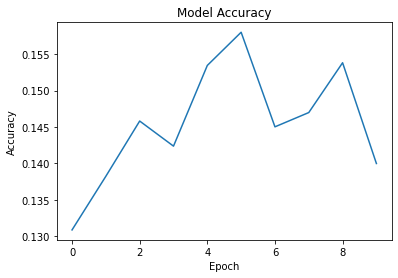

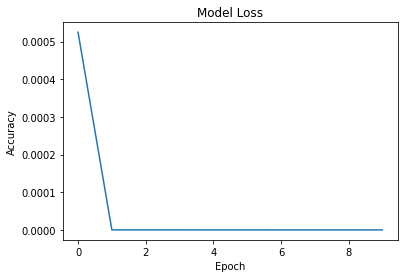

In [17]:
ModelFt('thick_walls')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 60 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Found 18848 validated image filenames.
Epoch 1/10
1884/1884 [==============================] - 89s 47ms/step - loss: 5.7320e-04 - accuracy: 0.0840
Epoch 2/10
1884/1884 [==============================] - 87s 46ms/step - loss: 2.4334e-07 - accuracy: 0.0890
Epoch 3/10
1884/1884 [==============================] - 88s 47ms/step - loss: 1.5441e-07 - accuracy: 0.0939
Epoch 4/10
1884/1884 [==============================] - 89s 47ms/step - loss: 8.7819e-08 - accuracy: 0.1040
Epoch 5/10
1884/1884 [==============================] - 89s 47ms/step - loss: 4.6799e-08 - accuracy: 0.1086
Epoch 6/10
1884/1884 [==============================] - 88s 47ms/step - loss: 2.5563e-08 - accuracy: 0.1242
Epoch 7/10
1884/1884 [==============================] - 87s 46ms/step - loss: 1.5502e-08 - accuracy: 0.1270
Epoch 8/10
1884/1884 [==============================] - 87s 46ms/step - loss: 1.0248e-08 - accuracy: 0.1378
Epoch 9/10
1884/1884 [==============================] - 87s 46ms/step - loss: 7.2938e-09 - accura

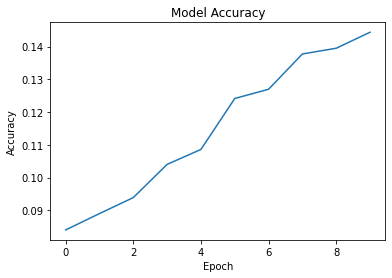

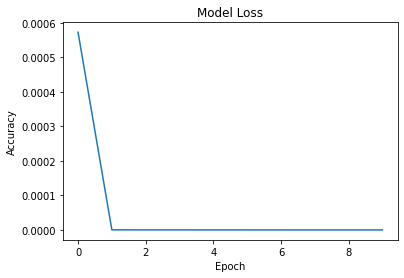

In [18]:
ModelFt('has_calcification')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 60 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 18848 validated image filenames.
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


1884/1884 [==============================] - 90s 47ms/step - loss: 4.6186e-04 - accuracy: 0.1214
Epoch 2/10
1884/1884 [==============================] - 88s 47ms/step - loss: 2.5003e-07 - accuracy: 0.1187
Epoch 3/10
1884/1884 [==============================] - 88s 46ms/step - loss: 1.4764e-07 - accuracy: 0.1141
Epoch 4/10
1884/1884 [==============================] - 88s 47ms/step - loss: 8.1542e-08 - accuracy: 0.1155
Epoch 5/10
1884/1884 [==============================] - 88s 47ms/step - loss: 4.2411e-08 - accuracy: 0.1183
Epoch 6/10
1884/1884 [==============================] - 89s 47ms/step - loss: 2.3496e-08 - accuracy: 0.1289
Epoch 7/10
1884/1884 [==============================] - 89s 47ms/step - loss: 1.4239e-08 - accuracy: 0.1314
Epoch 8/10
1884/1884 [==============================] - 91s 48ms/step - loss: 9.5830e-09 - accuracy: 0.1379
Epoch 9/10
1884/1884 [==============================] - 88s 47ms/step - loss: 6.9274e-09 - accuracy: 0.1441
Epoch 10/10
1884/1884 [================

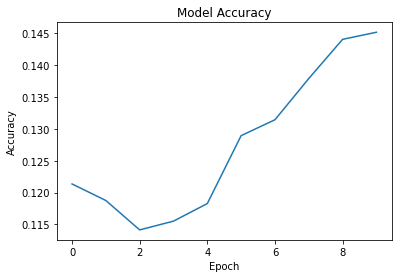

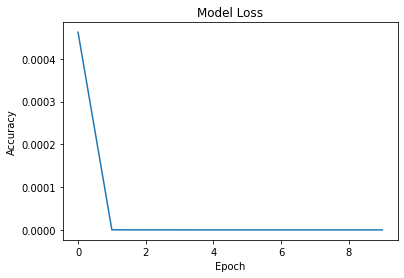

In [19]:
ModelFt('foci_around')